In [41]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

In [42]:
sp500=yf.download('^GSPC',start="2008-05-01", end="2009-02-01",interval='1wk')

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: title={'center': 'hourly'}, xlabel='Date'>

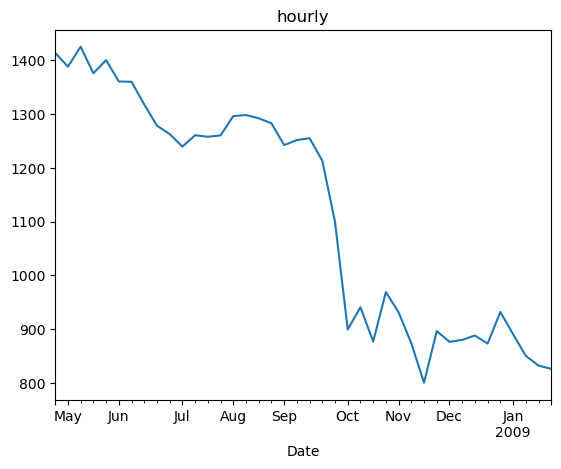

In [43]:
sp500['Adj Close'].plot( title='hourly')

In [44]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-04-28,1385.969971,1422.719971,1383.069946,1413.900024,1413.900024,8401810000
2008-05-05,1415.339966,1421.569946,1384.109985,1388.280029,1388.280029,18756220000
2008-05-12,1389.400024,1425.819946,1386.199951,1425.349976,1425.349976,19047660000
2008-05-19,1425.280029,1440.239990,1373.719971,1375.930054,1375.930054,19528620000
2008-05-26,1375.969971,1406.319946,1373.069946,1400.380005,1400.380005,15256170000


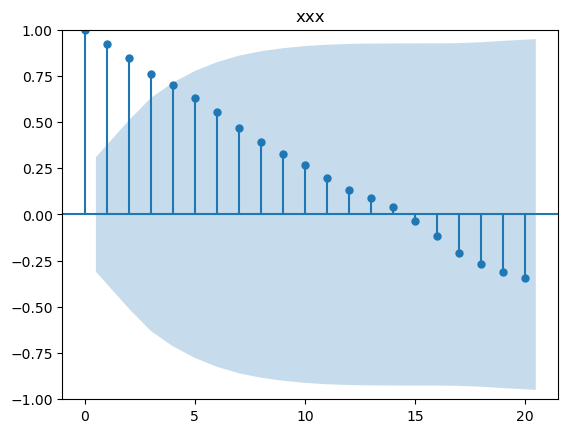

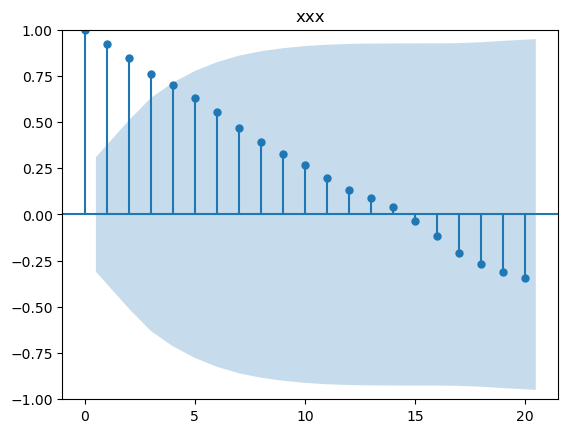

In [45]:
plot_acf(sp500['Adj Close'],lags=20,title='xxx')

In [46]:
# dicket fuller test sp500

In [47]:
adf_sp500, pvalue_sp500, usedlag_, nobs_, critical_values_sp500, icbest_ = adfuller(sp500['Adj Close'])
pvalue_sp500

0.8395838935706921

In [48]:
pvalue_sp500 # failed

0.8395838935706921

In [49]:
critical_values_sp500

{'1%': -3.610399601308181,
 '5%': -2.939108945868946,
 '10%': -2.6080629651545038}

In [50]:
# decomposition into trend, seasonal and residual

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
sp500_decomposition = seasonal_decompose(x=sp500['Adj Close'], model='additive', period=3)

In [52]:
sp500_trend = sp500_decomposition.trend
sp500_seasonal = sp500_decomposition.seasonal
sp500_residual = sp500_decomposition.resid

<AxesSubplot: title={'center': 'hourly'}, xlabel='Date'>

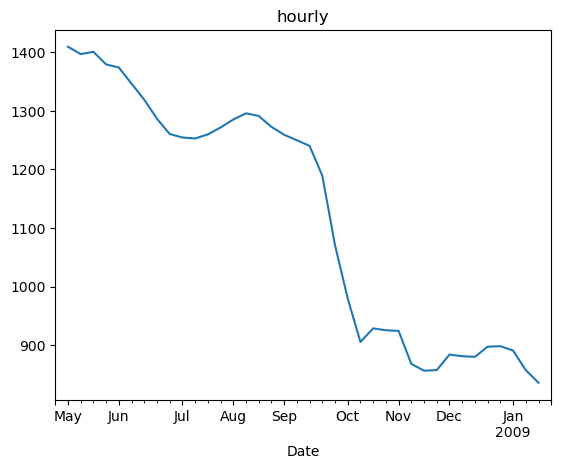

In [53]:
sp500_trend.plot( title='hourly')

<AxesSubplot: title={'center': 'hourly'}, xlabel='Date'>

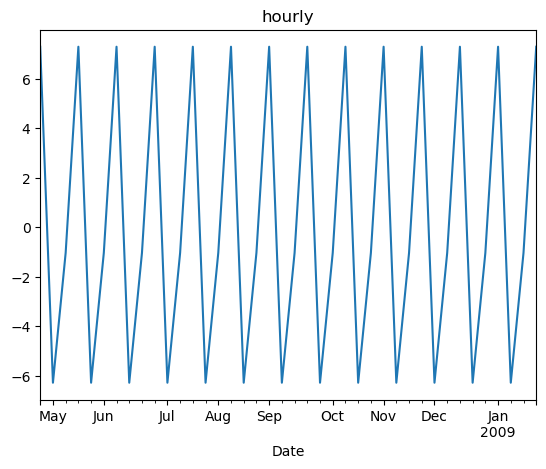

In [54]:
sp500_seasonal.plot( title='hourly')

<AxesSubplot: title={'center': 'hourly'}, xlabel='Date'>

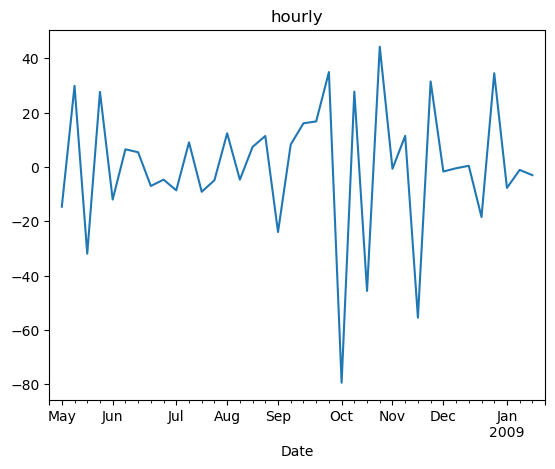

In [55]:
sp500_residual.plot( title='hourly')

In [56]:
# dickey fuller of residual
sp500_residual=sp500_residual[~np.isnan(sp500_residual)]

In [57]:
adf_sp500_residual, pvalue_sp500_residual, usedlag_, nobs_, critical_values_sp500_residual, icbest_ = adfuller(sp500_residual)
pvalue_sp500_residual

1.1551763158173053e-07

In [17]:
pvalue_sp500_residual # test passed

1.795089856263969e-22

In [18]:
critical_values_sp500_residual

{'1%': -3.4384189633001956, '5%': -2.86510158480911, '10%': -2.568666500743605}

In [19]:
# variance and mean test
sp500_residual.shape

(834,)

In [20]:
chunks_sp500_residual = np.split(sp500_residual, indices_or_sections=6)

In [21]:
np.mean(chunks_sp500_residual, axis=1)

array([-0.13519184, -0.00678269, -0.02783348,  0.07372901, -0.29049956,
        0.24514004])

In [22]:
np.var(chunks_sp500_residual, axis=1)

array([ 359.89790011,  221.86113754,  167.63763657,  261.47949677,
       1558.56999035, 2402.90132084])

In [23]:
# histogram

<AxesSubplot:>

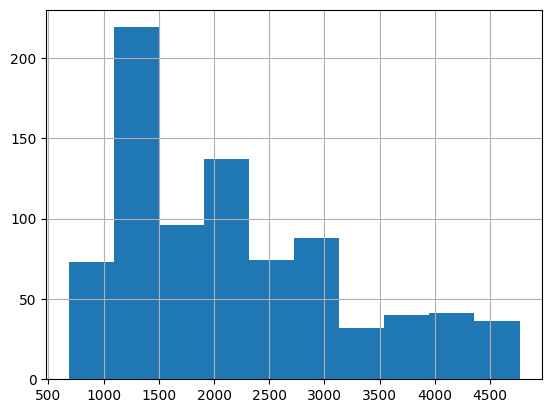

In [24]:
sp500['Adj Close'].hist() # no normal dist

In [25]:
# log transform

In [26]:
sp500_log = np.log(sp500['Adj Close'])

<AxesSubplot:title={'center':'hourly'}, xlabel='Date'>

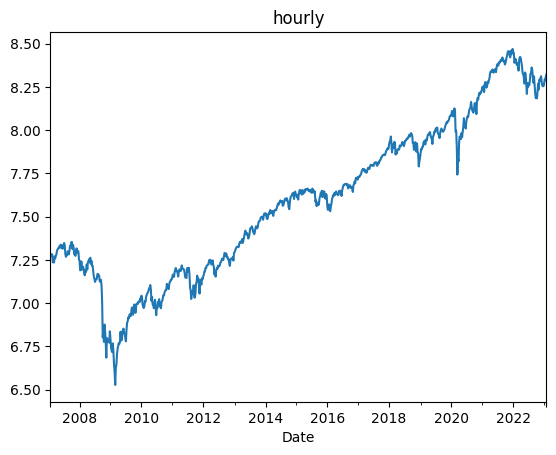

In [27]:
sp500_log.plot( title='hourly')

In [28]:
adf_sp500_log, pvalue_sp500_log, usedlag_, nobs_, critical_values_sp500_log, icbest_ = adfuller(sp500_log)
adf_sp500_log

-0.09828998382772879

In [29]:
pvalue_sp500_log

0.9496085915865863

In [30]:
critical_values_sp500_log

{'1%': -3.43821515743291, '5%': -2.8650117437698652, '10%': -2.568618642812369}

In [31]:
# difference

In [32]:
sp500_diff=sp500['Adj Close'].diff(periods=1)[~np.isnan(sp500['Adj Close'].diff(periods=1))]

<AxesSubplot:title={'center':'hourly'}, xlabel='Date'>

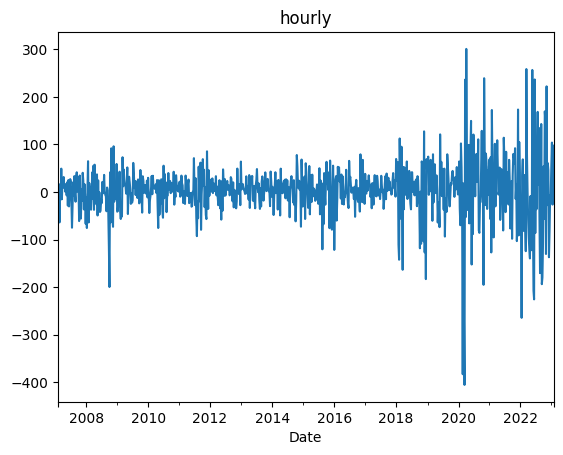

In [33]:
sp500_diff.plot( title='hourly')

In [34]:
# variance, mean test
sp500_diff

Date
2007-02-05    -10.329956
2007-02-12     17.479980
2007-02-19     -4.350098
2007-02-26    -64.019897
2007-03-05     15.669922
                 ...    
2023-01-02     55.580078
2023-01-09    104.010010
2023-01-16    -26.479980
2023-01-23     97.949951
2023-01-30     48.649902
Name: Adj Close, Length: 835, dtype: float64

In [35]:
sp500_diff.shape

(835,)

In [36]:
chunks_sp500_diff = np.split(sp500_diff, indices_or_sections=5) # for week data change it to 13
np.mean(chunks_sp500_diff,axis=1)

array([-1.53449108,  2.47994027,  3.12293431,  5.88311366,  6.04143666])

In [37]:
np.var(chunks_sp500_diff,axis=1)

array([ 1377.18031188,   836.4851803 ,  1113.8159009 ,  2230.45920631,
       11942.25296124])

In [38]:
# adf test

In [39]:
adf_sp500_diff, pvalue_sp500_diff, usedlag_, nobs_, critical_values_sp500_diff, icbest_ = adfuller(sp500_diff)
adf_sp500_diff

-30.69861373432765

In [43]:
pvalue_sp500_diff # pass

0.0

In [44]:
sp500_diff.shape

(835,)

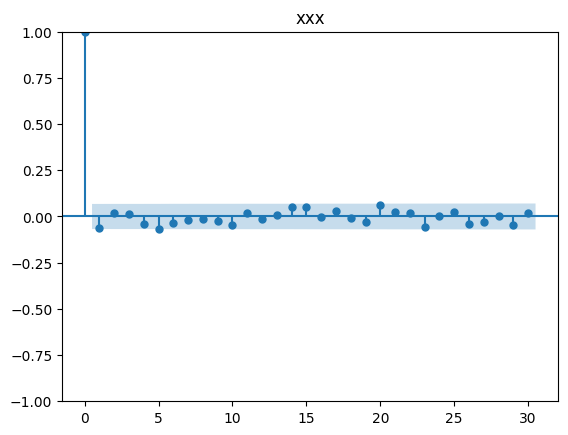

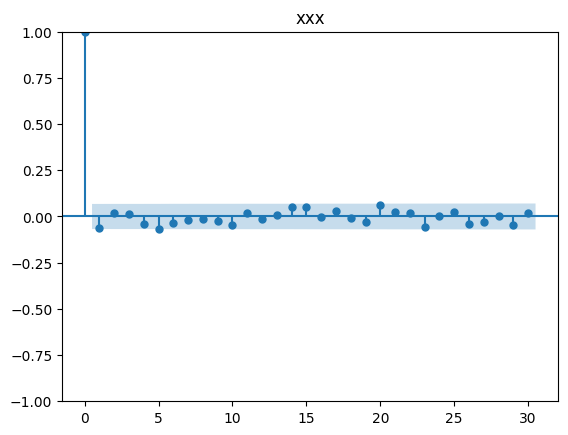

In [46]:
plot_acf(sp500_diff,lags=30,title='xxx')

C:\Users\hp\miniconda3\envs\kirtesh\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


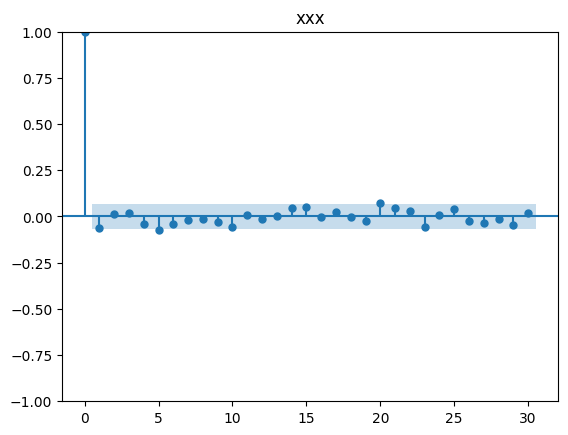

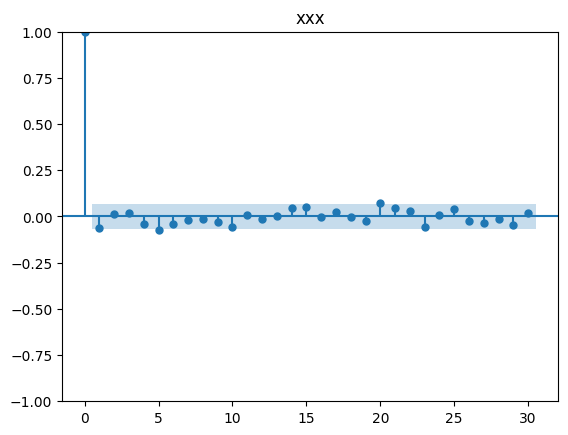

In [47]:
plot_pacf(sp500_diff,lags=30,title='xxx')